In [1]:
import os
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
import cv2
from PIL import Image
from torch.utils.data import Dataset
from torchvision import models
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

class ColorSpaceDataset(Dataset):
    def __init__(self, root, transform=None, color_space='rgb'):
        self.root = root
        self.transform = transform
        self.color_space = color_space
        self.image_folder = torchvision.datasets.ImageFolder(root)

    def __getitem__(self, index):
        img, target = self.image_folder[index]
        img = np.array(img)
        if self.color_space == 'hsv':
            img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
        elif self.color_space == 'lab':
            img = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)
        img = Image.fromarray(img)
        if self.transform is not None:
            img = self.transform(img)
        return img, target

    def __len__(self):
        return len(self.image_folder)

transform_train = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

transform_test = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

train_root = 'train_dataset'
rgb_dataset = ColorSpaceDataset(train_root, transform=transform_train, color_space='rgb')
hsv_dataset = ColorSpaceDataset(train_root, transform=transform_train, color_space='hsv')
lab_dataset = ColorSpaceDataset(train_root, transform=transform_train, color_space='lab')

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

num_classes = 4
rgb_model = models.densenet121(pretrained=True)
hsv_model = models.densenet121(pretrained=True)
lab_model = models.densenet121(pretrained=True)

for model in [rgb_model, hsv_model, lab_model]:
    num_features = model.classifier.in_features
    model.classifier = nn.Linear(num_features, num_classes)
    model = model.to(device)

def train_model(model, dataloader, criterion, optimizer, device, epochs):
    model.train()
    model_losses = []
    model_accuracies = []

    for epoch in range(epochs):
        print(f"Epoch {epoch + 1}/{epochs}")
        running_loss = 0.0
        running_corrects = 0
        total = 0

        for inputs, labels in dataloader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)

            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data).item()
            total += labels.size(0)

        epoch_loss = running_loss / total
        epoch_acc = running_corrects / total
        print(f"Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}")

        model_losses
        model_losses.append(epoch_loss)
        model_accuracies.append(epoch_acc)
    return model, model_losses, model_accuracies

c:\Users\iniak_rxbg54h\Desktop\bode_project\gpuvenv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\iniak_rxbg54h\Desktop\bode_project\gpuvenv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Training rgb model
Epoch 1/10
Loss: 0.4500 Acc: 0.8145
Epoch 2/10
Loss: 0.2573 Acc: 0.8955
Epoch 3/10
Loss: 0.2347 Acc: 0.9105
Epoch 4/10
Loss: 0.1913 Acc: 0.9265
Epoch 5/10
Loss: 0.1733 Acc: 0.9307
Epoch 6/10
Loss: 0.1822 Acc: 0.9345
Epoch 7/10
Loss: 0.1351 Acc: 0.9473
Epoch 8/10
Loss: 0.1348 Acc: 0.9477
Epoch 9/10
Loss: 0.1349 Acc: 0.9513
Epoch 10/10
Loss: 0.1329 Acc: 0.9495
Training hsv model
Epoch 1/10
Loss: 0.6348 Acc: 0.6943
Epoch 2/10
Loss: 0.4874 Acc: 0.7408
Epoch 3/10
Loss: 0.4441 Acc: 0.7590
Epoch 4/10
Loss: 0.4266 Acc: 0.7745
Epoch 5/10
Loss: 0.3863 Acc: 0.7885
Epoch 6/10
Loss: 0.3698 Acc: 0.7980
Epoch 7/10
Loss: 0.3534 Acc: 0.8135
Epoch 8/10
Loss: 0.3342 Acc: 0.8280
Epoch 9/10
Loss: 0.3015 Acc: 0.8480
Epoch 10/10
Loss: 0.3097 Acc: 0.8393
Training lab model
Epoch 1/10
Loss: 0.4871 Acc: 0.7817
Epoch 2/10
Loss: 0.2984 Acc: 0.8738
Epoch 3/10
Loss: 0.2801 Acc: 0.8832
Epoch 4/10
Loss: 0.2382 Acc: 0.9095
Epoch 5/10
Loss: 0.2104 Acc: 0.9165
Epoch 6/10
Loss: 0.1689 Acc: 0.9333
Epoch

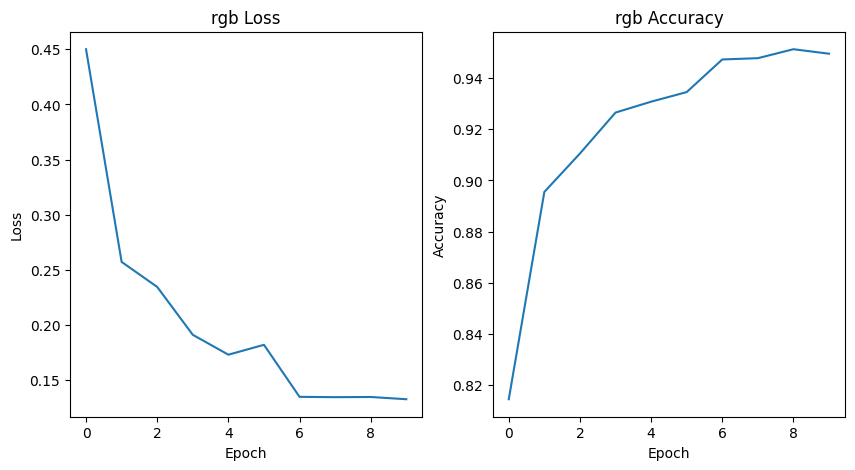

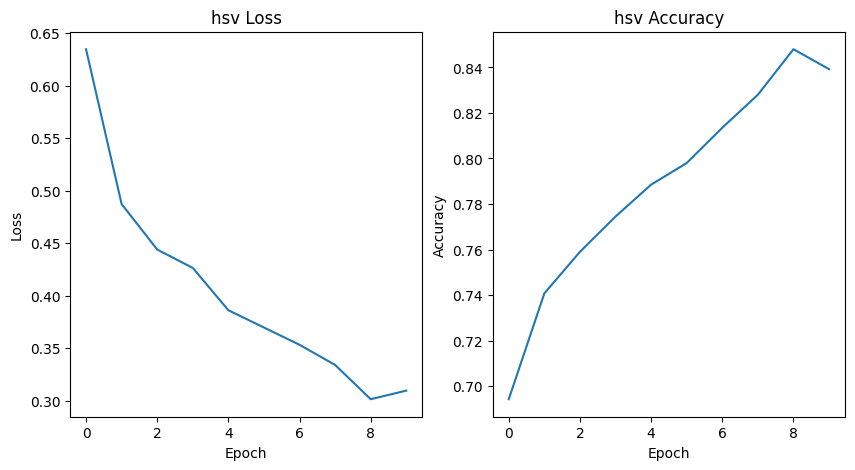

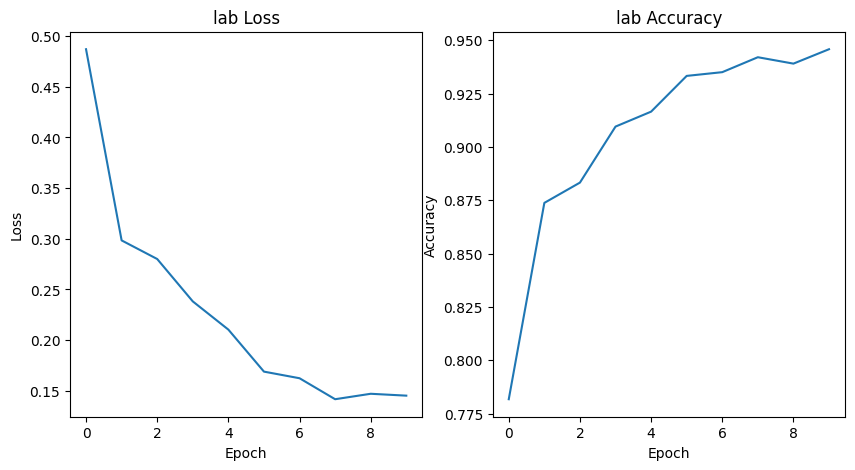

Test accuracy of the RGB pretrained network: 0.8860
Test accuracy of the HSV pretrained network: 0.8240
Test accuracy of the LAB pretrained network: 0.8858
RGB Model Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.99      0.85      1000
           1       0.95      0.96      0.95      1000
           2       0.99      0.98      0.99      1000
           3       0.92      0.62      0.74      1000

    accuracy                           0.89      4000
   macro avg       0.90      0.89      0.88      4000
weighted avg       0.90      0.89      0.88      4000

RGB Model Confusion Matrix:
[[988   9   2   1]
 [  4 959   2  35]
 [  1   5 978  16]
 [339  41   1 619]]


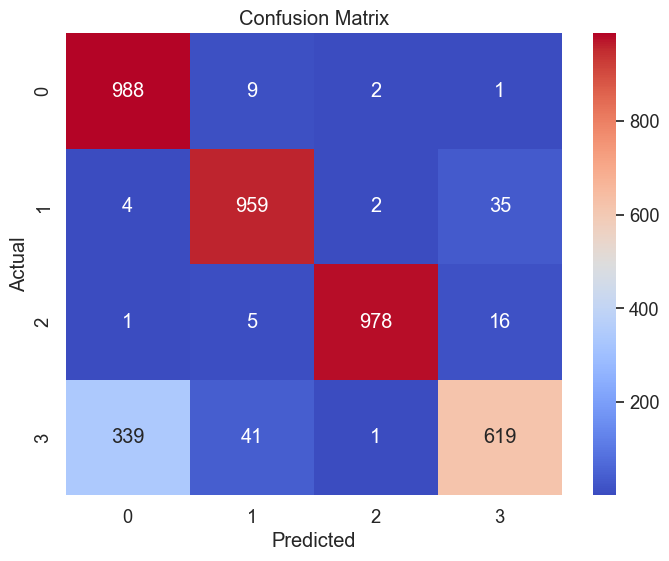

HSV Model Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.82      0.72      1000
           1       0.97      0.98      0.97      1000
           2       0.98      0.98      0.98      1000
           3       0.74      0.51      0.60      1000

    accuracy                           0.82      4000
   macro avg       0.83      0.82      0.82      4000
weighted avg       0.83      0.82      0.82      4000

HSV Model Confusion Matrix:
[[820   8   9 163]
 [  4 980   0  16]
 [  0  13 985   2]
 [465  11  13 511]]


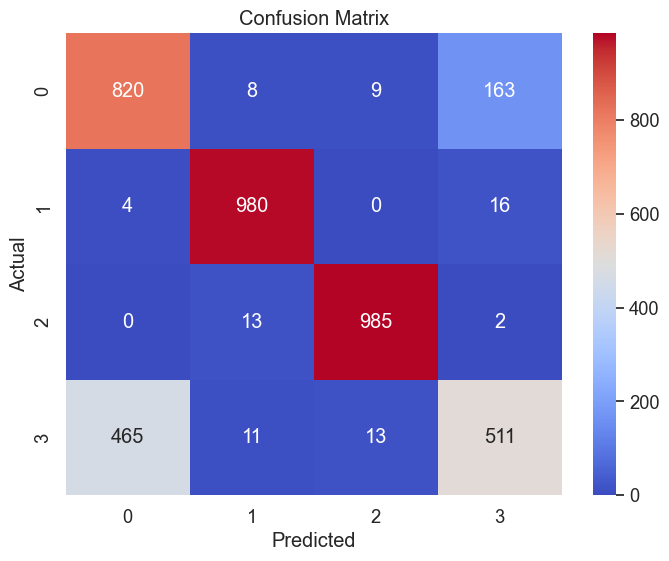

LAB Model Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.97      0.87      1000
           1       0.96      0.86      0.91      1000
           2       1.00      0.93      0.96      1000
           3       0.83      0.78      0.80      1000

    accuracy                           0.89      4000
   macro avg       0.89      0.89      0.89      4000
weighted avg       0.89      0.89      0.89      4000

LAB Model Confusion Matrix:
[[975   5   1  19]
 [ 40 864   0  96]
 [  1  24 928  47]
 [214   9   1 776]]


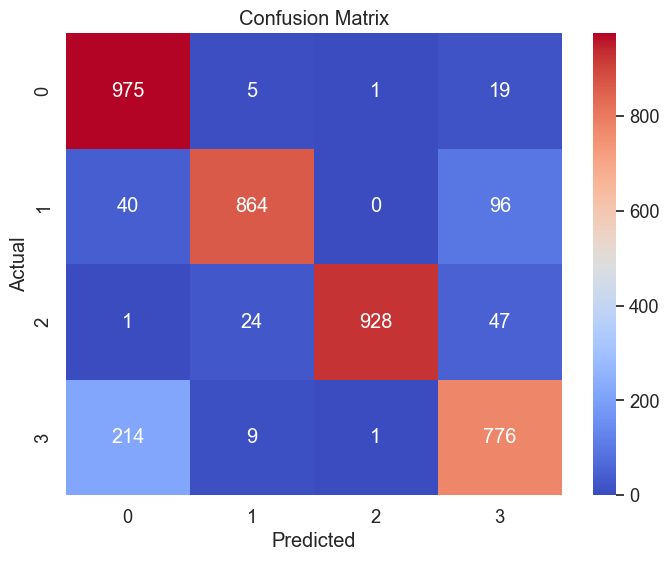

In [2]:
epochs = 10
batch_size = 32
lr = 0.001

dataloaders = {
    'rgb': torch.utils.data.DataLoader(rgb_dataset, batch_size=batch_size, shuffle=True, num_workers=0),
    'hsv': torch.utils.data.DataLoader(hsv_dataset, batch_size=batch_size, shuffle=True, num_workers=0),
    'lab': torch.utils.data.DataLoader(lab_dataset, batch_size=batch_size, shuffle=True, num_workers=0),
}

models_to_train = {
    'rgb': rgb_model,
    'hsv': hsv_model,
    'lab': lab_model
}

trained_models = {}
model_losses = {}
model_accuracies = {}
for name, model in models_to_train.items():
    print(f"Training {name} model")
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    model, losses, accuracies = train_model(model, dataloaders[name], criterion, optimizer, device, epochs)
    trained_models[name] = model
    model_losses[name] = losses
    model_accuracies[name] = accuracies

def plot_loss_acc(name, losses, accuracies):
    plt.figure(figsize=(10, 5))
    plt.subplot(121)
    plt.plot(losses)
    plt.title(f'{name} Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')

    plt.subplot(122)
    plt.plot(accuracies)
    plt.title(f'{name} Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')

    plt.show()

for name in ['rgb', 'hsv', 'lab']:
    plot_loss_acc(name, model_losses[name], model_accuracies[name])

def calculate_accuracy_and_metrics(model, dataloader, device):
    model.eval()
    correct_preds = 0
    total_preds = 0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            correct_preds += torch.sum(preds == labels).item()
            total_preds += labels.size(0)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    accuracy = correct_preds / total_preds
    report = classification_report(all_labels, all_preds)
    cm = confusion_matrix(all_labels, all_preds)

    return accuracy, report, cm

test_root = 'test_dataset'
rgb_test_dataset = ColorSpaceDataset(test_root, transform=transform_test, color_space='rgb')
hsv_test_dataset = ColorSpaceDataset(test_root, transform=transform_test, color_space='hsv')
lab_test_dataset = ColorSpaceDataset(test_root, transform=transform_test, color_space='lab')

test_dataloaders = {
    'rgb': torch.utils.data.DataLoader(rgb_test_dataset, batch_size=batch_size, shuffle=False, num_workers=0),
    'hsv': torch.utils.data.DataLoader(hsv_test_dataset, batch_size=batch_size, shuffle=False, num_workers=0),
    'lab': torch.utils.data.DataLoader(lab_test_dataset, batch_size=batch_size, shuffle=False, num_workers=0),
}

rgb_test_accuracy, rgb_report, rgb_cm = calculate_accuracy_and_metrics(trained_models['rgb'], test_dataloaders['rgb'], device)
hsv_test_accuracy, hsv_report, hsv_cm = calculate_accuracy_and_metrics(trained_models['hsv'], test_dataloaders['hsv'], device)
lab_test_accuracy, lab_report, lab_cm = calculate_accuracy_and_metrics(trained_models['lab'], test_dataloaders['lab'], device)

print(f"Test accuracy of the RGB pretrained network: {rgb_test_accuracy:.4f}")
print(f"Test accuracy of the HSV pretrained network: {hsv_test_accuracy:.4f}")
print(f"Test accuracy of the LAB pretrained network: {lab_test_accuracy:.4f}")

import seaborn as sns

print("RGB Model Classification Report:")
print(rgb_report)
print("RGB Model Confusion Matrix:")
print(rgb_cm)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Increase the font size
sns.heatmap(rgb_cm, annot=True, fmt='g', cmap='coolwarm', xticklabels=[0, 1, 2, 3], yticklabels=[0, 1, 2, 3])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("HSV Model Classification Report:")
print(hsv_report)
print("HSV Model Confusion Matrix:")
print(hsv_cm)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Increase the font size
sns.heatmap(hsv_cm, annot=True, fmt='g', cmap='coolwarm', xticklabels=[0, 1, 2, 3], yticklabels=[0, 1, 2, 3])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


print("LAB Model Classification Report:")
print(lab_report)
print("LAB Model Confusion Matrix:")
print(lab_cm)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Increase the font size
sns.heatmap(lab_cm, annot=True, fmt='g', cmap='coolwarm', xticklabels=[0, 1, 2, 3], yticklabels=[0, 1, 2, 3])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()




In [3]:
# class_names = train_dataset.classes

In [4]:
torch.save(rgb_model.state_dict(), 'rgb_model.pth')
torch.save(lab_model.state_dict(), 'hsv_model.pth')
torch.save(hsv_model.state_dict(), 'lab_model.pth')

In [5]:
# Extract features from the pre-trained models
def extract_features(model, dataloader, device):
    features = []
    targets = []
    model.eval()
    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            output = model(inputs)
            features.extend(output.cpu().numpy())
            targets.extend(labels.cpu().numpy())

    return np.array(features), np.array(targets)


In [6]:
# !pip install seaborn

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Extract features
rgb_train_features, rgb_train_targets = extract_features(trained_models['rgb'], dataloaders['rgb'], device)
hsv_train_features, hsv_train_targets = extract_features(trained_models['hsv'], dataloaders['hsv'], device)
lab_train_features, lab_train_targets = extract_features(trained_models['lab'], dataloaders['lab'], device)

rgb_test_features, rgb_test_targets = extract_features(trained_models['rgb'], test_dataloaders['rgb'], device)
hsv_test_features, hsv_test_targets = extract_features(trained_models['hsv'], test_dataloaders['hsv'], device)
lab_test_features, lab_test_targets = extract_features(trained_models['lab'], test_dataloaders['lab'], device)

# Stack the features
stacked_train_features = np.hstack([rgb_train_features, hsv_train_features, lab_train_features])
stacked_test_features = np.hstack([rgb_test_features, hsv_test_features, lab_test_features])

# Define the hyperparameter grid
param_grid = {
    'base_estimator__max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400, 450, 500],
}

# Initialize the AdaBoost classifier
base_estimator = DecisionTreeClassifier()
adaboost_clf = AdaBoostClassifier(base_estimator=base_estimator)

# Create the grid search object
grid_search = GridSearchCV(adaboost_clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform the grid search
grid_search.fit(stacked_train_features, rgb_train_targets)

# Find the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f"Best parameters found: {best_params}")

# Test the best AdaBoost model on the stacked test features
stacked_test_accuracy = best_model.score(stacked_test_features, rgb_test_targets)

print(f"Test accuracy of the AdaBoost model on stacked test features: {stacked_test_accuracy:.4f}")


c:\Users\iniak_rxbg54h\Desktop\bode_project\gpuvenv\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Best parameters found: {'base_estimator__max_depth': 9, 'n_estimators': 400}
Test accuracy of the AdaBoost model on stacked test features: 0.9083


[[853   6   0 141]
 [  4 935   3  58]
 [  0   0 978  22]
 [108  24   1 867]]


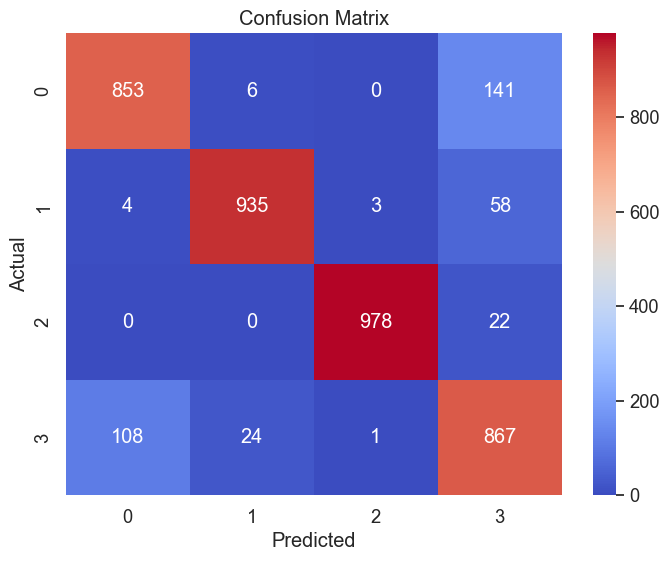

Classification report:
              precision    recall  f1-score   support

           0       0.88      0.85      0.87      1000
           1       0.97      0.94      0.95      1000
           2       1.00      0.98      0.99      1000
           3       0.80      0.87      0.83      1000

    accuracy                           0.91      4000
   macro avg       0.91      0.91      0.91      4000
weighted avg       0.91      0.91      0.91      4000



In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

import seaborn as sns

# Get predictions for the test set
y_pred = best_model.predict(stacked_test_features)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(rgb_test_targets, y_pred)

print(conf_matrix)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Increase the font size
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='coolwarm', xticklabels=[0, 1, 2, 3], yticklabels=[0, 1, 2, 3])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print("Classification report:")
print(classification_report(rgb_test_targets, y_pred))


In [9]:
import pickle

# Save the best AdaBoost model to a file
with open('best_adaboost_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

print("The best AdaBoost model has been saved to 'best_adaboost_model.pkl'")


The best AdaBoost model has been saved to 'best_adaboost_model.pkl'


In [10]:
# Load the saved AdaBoost model from a file
with open('best_adaboost_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

print("The best AdaBoost model has been loaded from 'best_adaboost_model.pkl'")


The best AdaBoost model has been loaded from 'best_adaboost_model.pkl'


In [11]:
import cv2
from PIL import Image
import torch
import torchvision.transforms as transforms
import numpy as np

def preprocess_image(image_path, transform, color_space='rgb'):
    img = Image.open(image_path)
    img = np.array(img)
    
    if color_space == 'hsv':
        img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    elif color_space == 'lab':
        img = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)
    
    img = Image.fromarray(img)
    img = transform(img)
    img = img.unsqueeze(0)  # Add a batch dimension
    return img

def extract_features_from_image(model, image_tensor, device):
    model.eval()
    image_tensor = image_tensor.to(device)
    
    with torch.no_grad():
        features = model(image_tensor)
    
    return features.cpu().numpy()

image_path = 'ISIC_1457687.jpg'
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Preprocess the input image for each color space
rgb_image = preprocess_image(image_path, transform, color_space='rgb')
hsv_image = preprocess_image(image_path, transform, color_space='hsv')
lab_image = preprocess_image(image_path, transform, color_space='lab')

# Extract features for each color space using pre-trained models
rgb_features = extract_features_from_image(trained_models['rgb'], rgb_image, device)
hsv_features = extract_features_from_image(trained_models['hsv'], hsv_image, device)
lab_features = extract_features_from_image(trained_models['lab'], lab_image, device)

# Stack the features
stacked_features = np.hstack([rgb_features, hsv_features, lab_features])

# Predict the class using the loaded AdaBoost model
y_pred = loaded_model.predict(stacked_features)

print(f"The predicted class for the input image is: {y_pred[0]}")

# Define a dictionary to map the predicted class to a text description
class_description = {
    0: "blur, please take another photo",
    1: "cropped, it does not capture the lesion properly, please take another photo",
    2: "too dark (low illumination), please take another photo",
    3: "high quality, Great!!!"
}

# Get the text description for the predicted class
prediction_text = class_description.get(y_pred[0], "Unknown")

print(f"The input image is: {prediction_text}")


The predicted class for the input image is: 2
The input image is: too dark (low illumination), please take another photo
